In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv") 
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
data.shape

(907, 27)

In [6]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
value_counts = {'primary_fuel','other_fuel1','other_fuel2','other_fuel3'}

# Get value counts for specified columns
for column in value_counts:
    print(f"Value counts for {column}:\n{data[column].value_counts()}\n")
    print('-------------------------------------------------------------')


Value counts for other_fuel2:
Oil    1
Name: other_fuel2, dtype: int64

-------------------------------------------------------------
Value counts for primary_fuel:
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

-------------------------------------------------------------
Value counts for other_fuel3:
Series([], Name: other_fuel3, dtype: int64)

-------------------------------------------------------------
Value counts for other_fuel1:
Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

-------------------------------------------------------------


In [8]:
for column in data.columns:
    unique_count = data[column].nunique()
    print("Column:", column,'====', unique_count)

Column: country ==== 1
Column: country_long ==== 1
Column: name ==== 907
Column: gppd_idnr ==== 907
Column: capacity_mw ==== 361
Column: latitude ==== 836
Column: longitude ==== 827
Column: primary_fuel ==== 8
Column: other_fuel1 ==== 3
Column: other_fuel2 ==== 1
Column: other_fuel3 ==== 0
Column: commissioning_year ==== 73
Column: owner ==== 280
Column: source ==== 191
Column: url ==== 304
Column: geolocation_source ==== 3
Column: wepp_id ==== 0
Column: year_of_capacity_data ==== 1
Column: generation_gwh_2013 ==== 0
Column: generation_gwh_2014 ==== 371
Column: generation_gwh_2015 ==== 396
Column: generation_gwh_2016 ==== 403
Column: generation_gwh_2017 ==== 408
Column: generation_gwh_2018 ==== 410
Column: generation_gwh_2019 ==== 0
Column: generation_data_source ==== 1
Column: estimated_generation_gwh ==== 0


<AxesSubplot:>

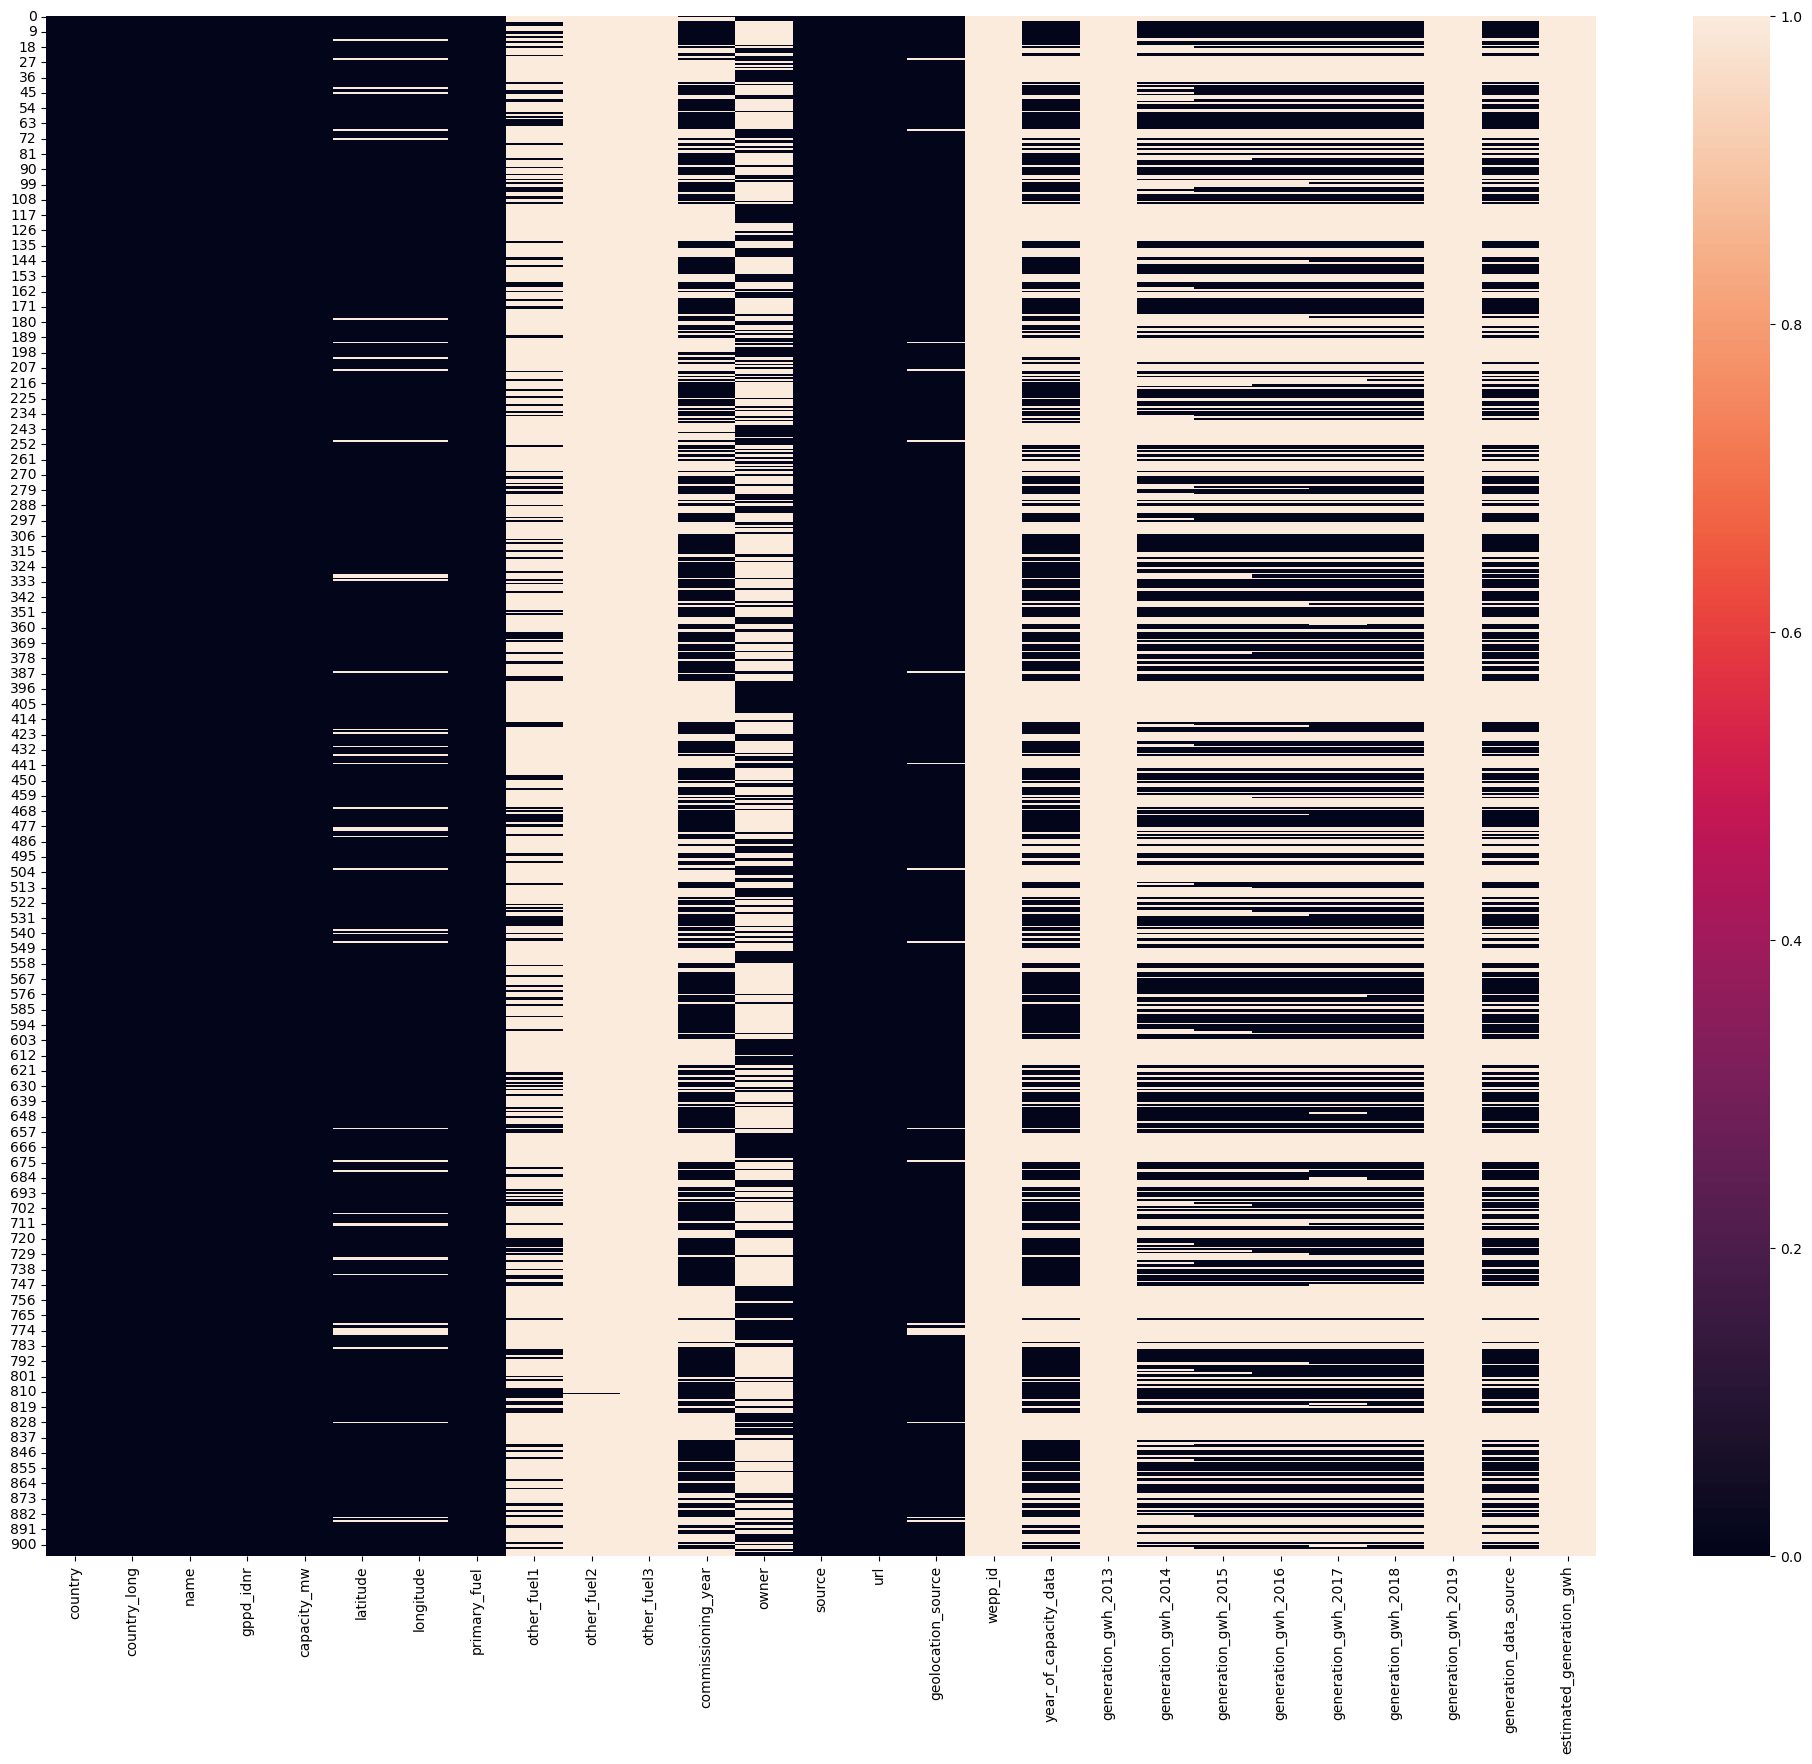

In [9]:
plt.figure(figsize=(25,20))
sns.heatmap(data.isnull())

##### The data set is about global power plants. But the information here is from India only. 
##### It has 907 rows and 27 columns. Null value is present in most of the columns.


In [10]:
null_col = data.isnull().sum()/data.shape[0]*100
null_col

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.071665
longitude                     5.071665
primary_fuel                  0.000000
other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
commissioning_year           41.896362
owner                        62.293275
source                        0.000000
url                           0.000000
geolocation_source            2.094818
wepp_id                     100.000000
year_of_capacity_data        42.778390
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source   

#### Because many of our columns contain null values, we will remove those columns that have more than 20% null values.

In [11]:
drop_columns = null_col[null_col>20].keys()
drop_columns

Index(['other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year',
       'owner', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'generation_data_source', 'estimated_generation_gwh'],
      dtype='object')

In [12]:
data1 = data.drop(columns=drop_columns)

In [13]:
data1.shape

(907, 11)

<AxesSubplot:>

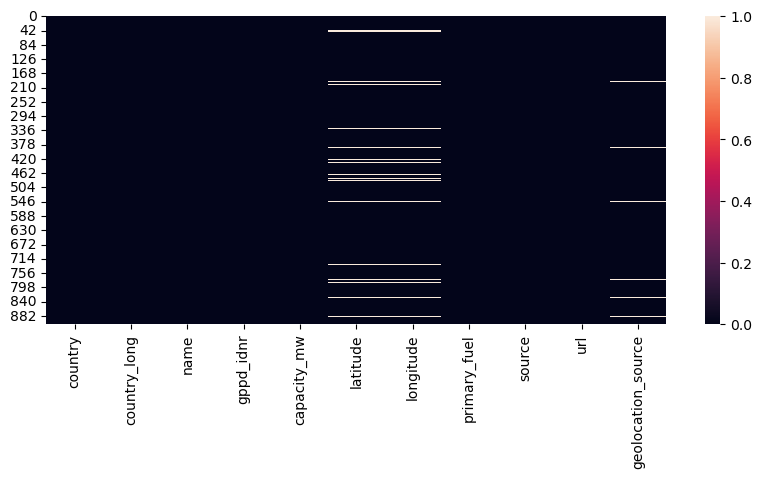

In [14]:
plt.figure(figsize=(10,4))
sns.heatmap(data1.isnull())

##### Will delete the remaining row of null values.

In [15]:
data2 = data1.dropna()

In [16]:
data2.shape

(861, 11)

<AxesSubplot:>

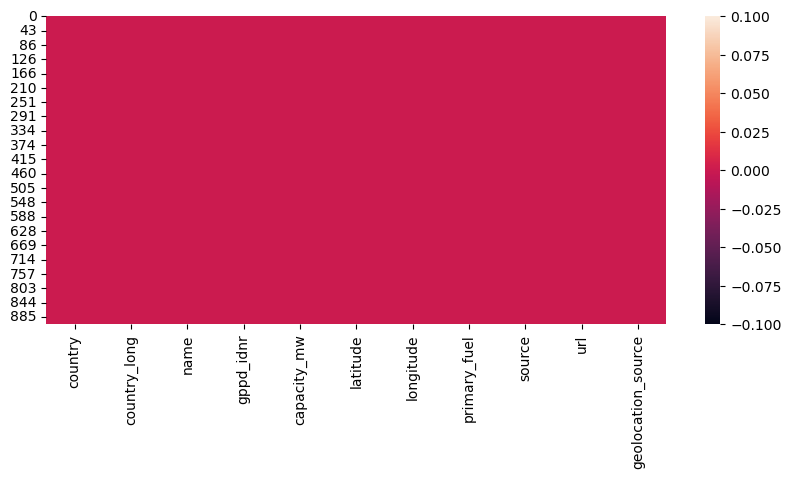

In [17]:
plt.figure(figsize=(10,4))
sns.heatmap(data2.isnull())

##### All null values have been removed. We can also see this in number form.

In [18]:
data2.isnull().sum()

country               0
country_long          0
name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
url                   0
geolocation_source    0
dtype: int64

#### there is no null values present

In [19]:
data2.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI


In [20]:
for column in data2.columns:
    unique_count = data[column].nunique()
    print("Column:", column,'====', unique_count)

Column: country ==== 1
Column: country_long ==== 1
Column: name ==== 907
Column: gppd_idnr ==== 907
Column: capacity_mw ==== 361
Column: latitude ==== 836
Column: longitude ==== 827
Column: primary_fuel ==== 8
Column: source ==== 191
Column: url ==== 304
Column: geolocation_source ==== 3


##### We will delete all Country, country_long, name, gppd_idnr, url from this data set as it is not useful for our project.

In [21]:
data2 = data2.drop(columns=['country','country_long','name','gppd_idnr','url'])
data2.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,CDM,WRI
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI


In [22]:
data2 = data2.drop(columns=['source'])
data2.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,WRI
2,39.2,21.9038,69.3732,Wind,WRI
3,135.0,23.8712,91.3602,Gas,WRI
4,1800.0,21.9603,82.4091,Coal,WRI


In [23]:
for column in data2.columns:
    unique_count = data[column].nunique()
    print("Column:", column,'====', unique_count)

Column: capacity_mw ==== 361
Column: latitude ==== 836
Column: longitude ==== 827
Column: primary_fuel ==== 8
Column: geolocation_source ==== 3


In [24]:
from sklearn.preprocessing import OrdinalEncoder
enc_columns = ['primary_fuel','geolocation_source']
encoder = OrdinalEncoder()

for column in enc_columns:
    data2[column] = encoder.fit_transform(data2[[column]])
    
data2.head

<bound method NDFrame.head of      capacity_mw  latitude  longitude  primary_fuel  geolocation_source
0            2.5   28.1839    73.2407           6.0                 1.0
1           98.0   24.7663    74.6090           1.0                 2.0
2           39.2   21.9038    69.3732           7.0                 2.0
3          135.0   23.8712    91.3602           2.0                 2.0
4         1800.0   21.9603    82.4091           1.0                 2.0
..           ...       ...        ...           ...                 ...
902       1600.0   16.2949    77.3568           1.0                 2.0
903          3.0   12.8932    78.1654           6.0                 0.0
904         25.5   15.2758    75.5811           7.0                 2.0
905         80.0   24.3500    73.7477           1.0                 2.0
906         16.5    9.9344    77.4768           7.0                 2.0

[861 rows x 5 columns]>

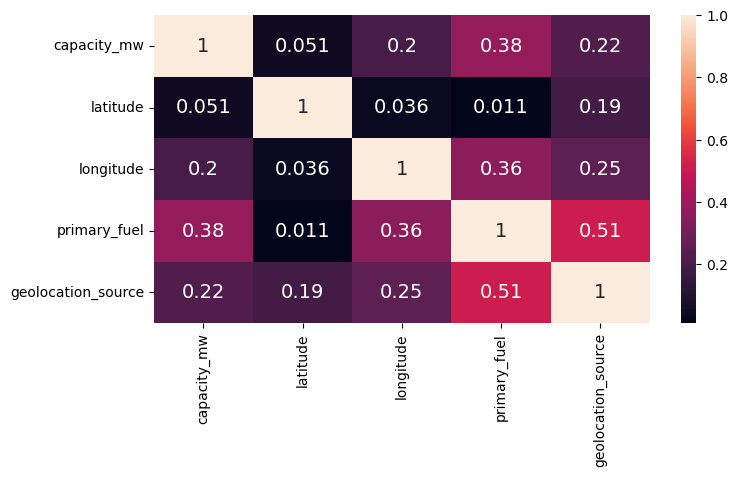

In [25]:
plt.figure(figsize=(8,4))
sns.heatmap(data2.corr().abs(), annot=True, annot_kws={"size": 14})

plt.show()

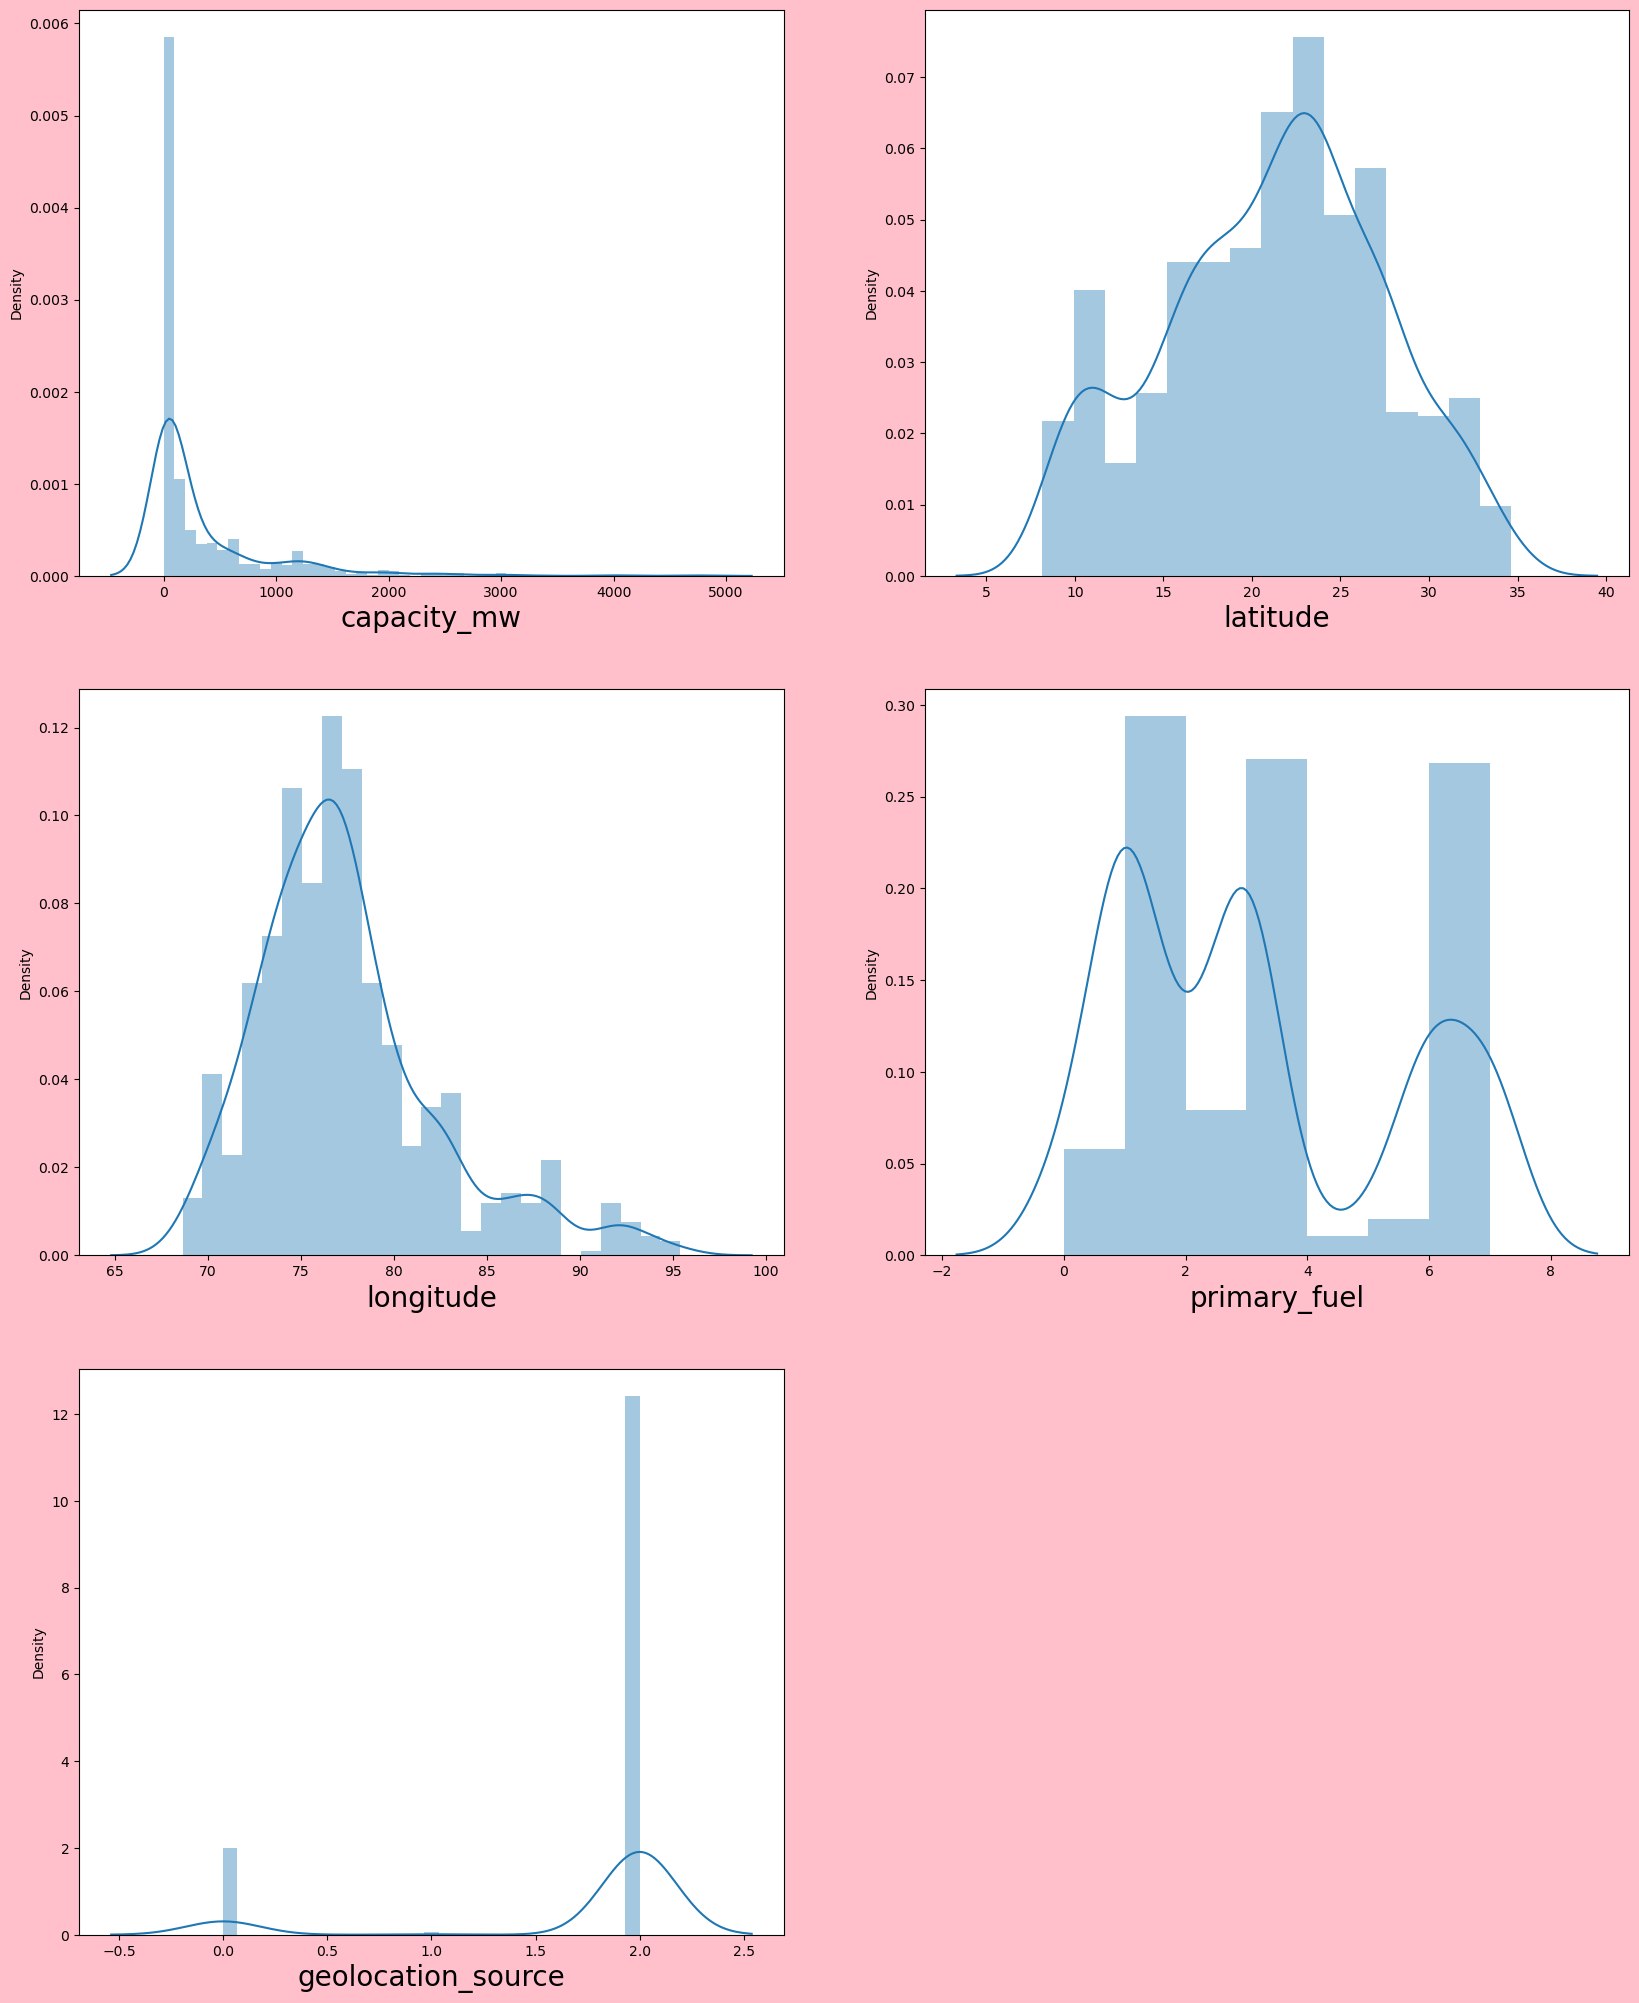

In [26]:
plt.figure(figsize=(20,25), facecolor='pink') 
plotnumber= 1

for column in data2:
    if plotnumber<=6:        
        ax = plt.subplot(3,2,plotnumber) 
        sns.distplot(data2[column]) 
        plt.xlabel(column, fontsize=20)



    plotnumber+=1
plt.show()

In [27]:
data2.skew()

capacity_mw           3.037191
latitude             -0.145866
longitude             1.112646
primary_fuel          0.507576
geolocation_source   -2.072165
dtype: float64

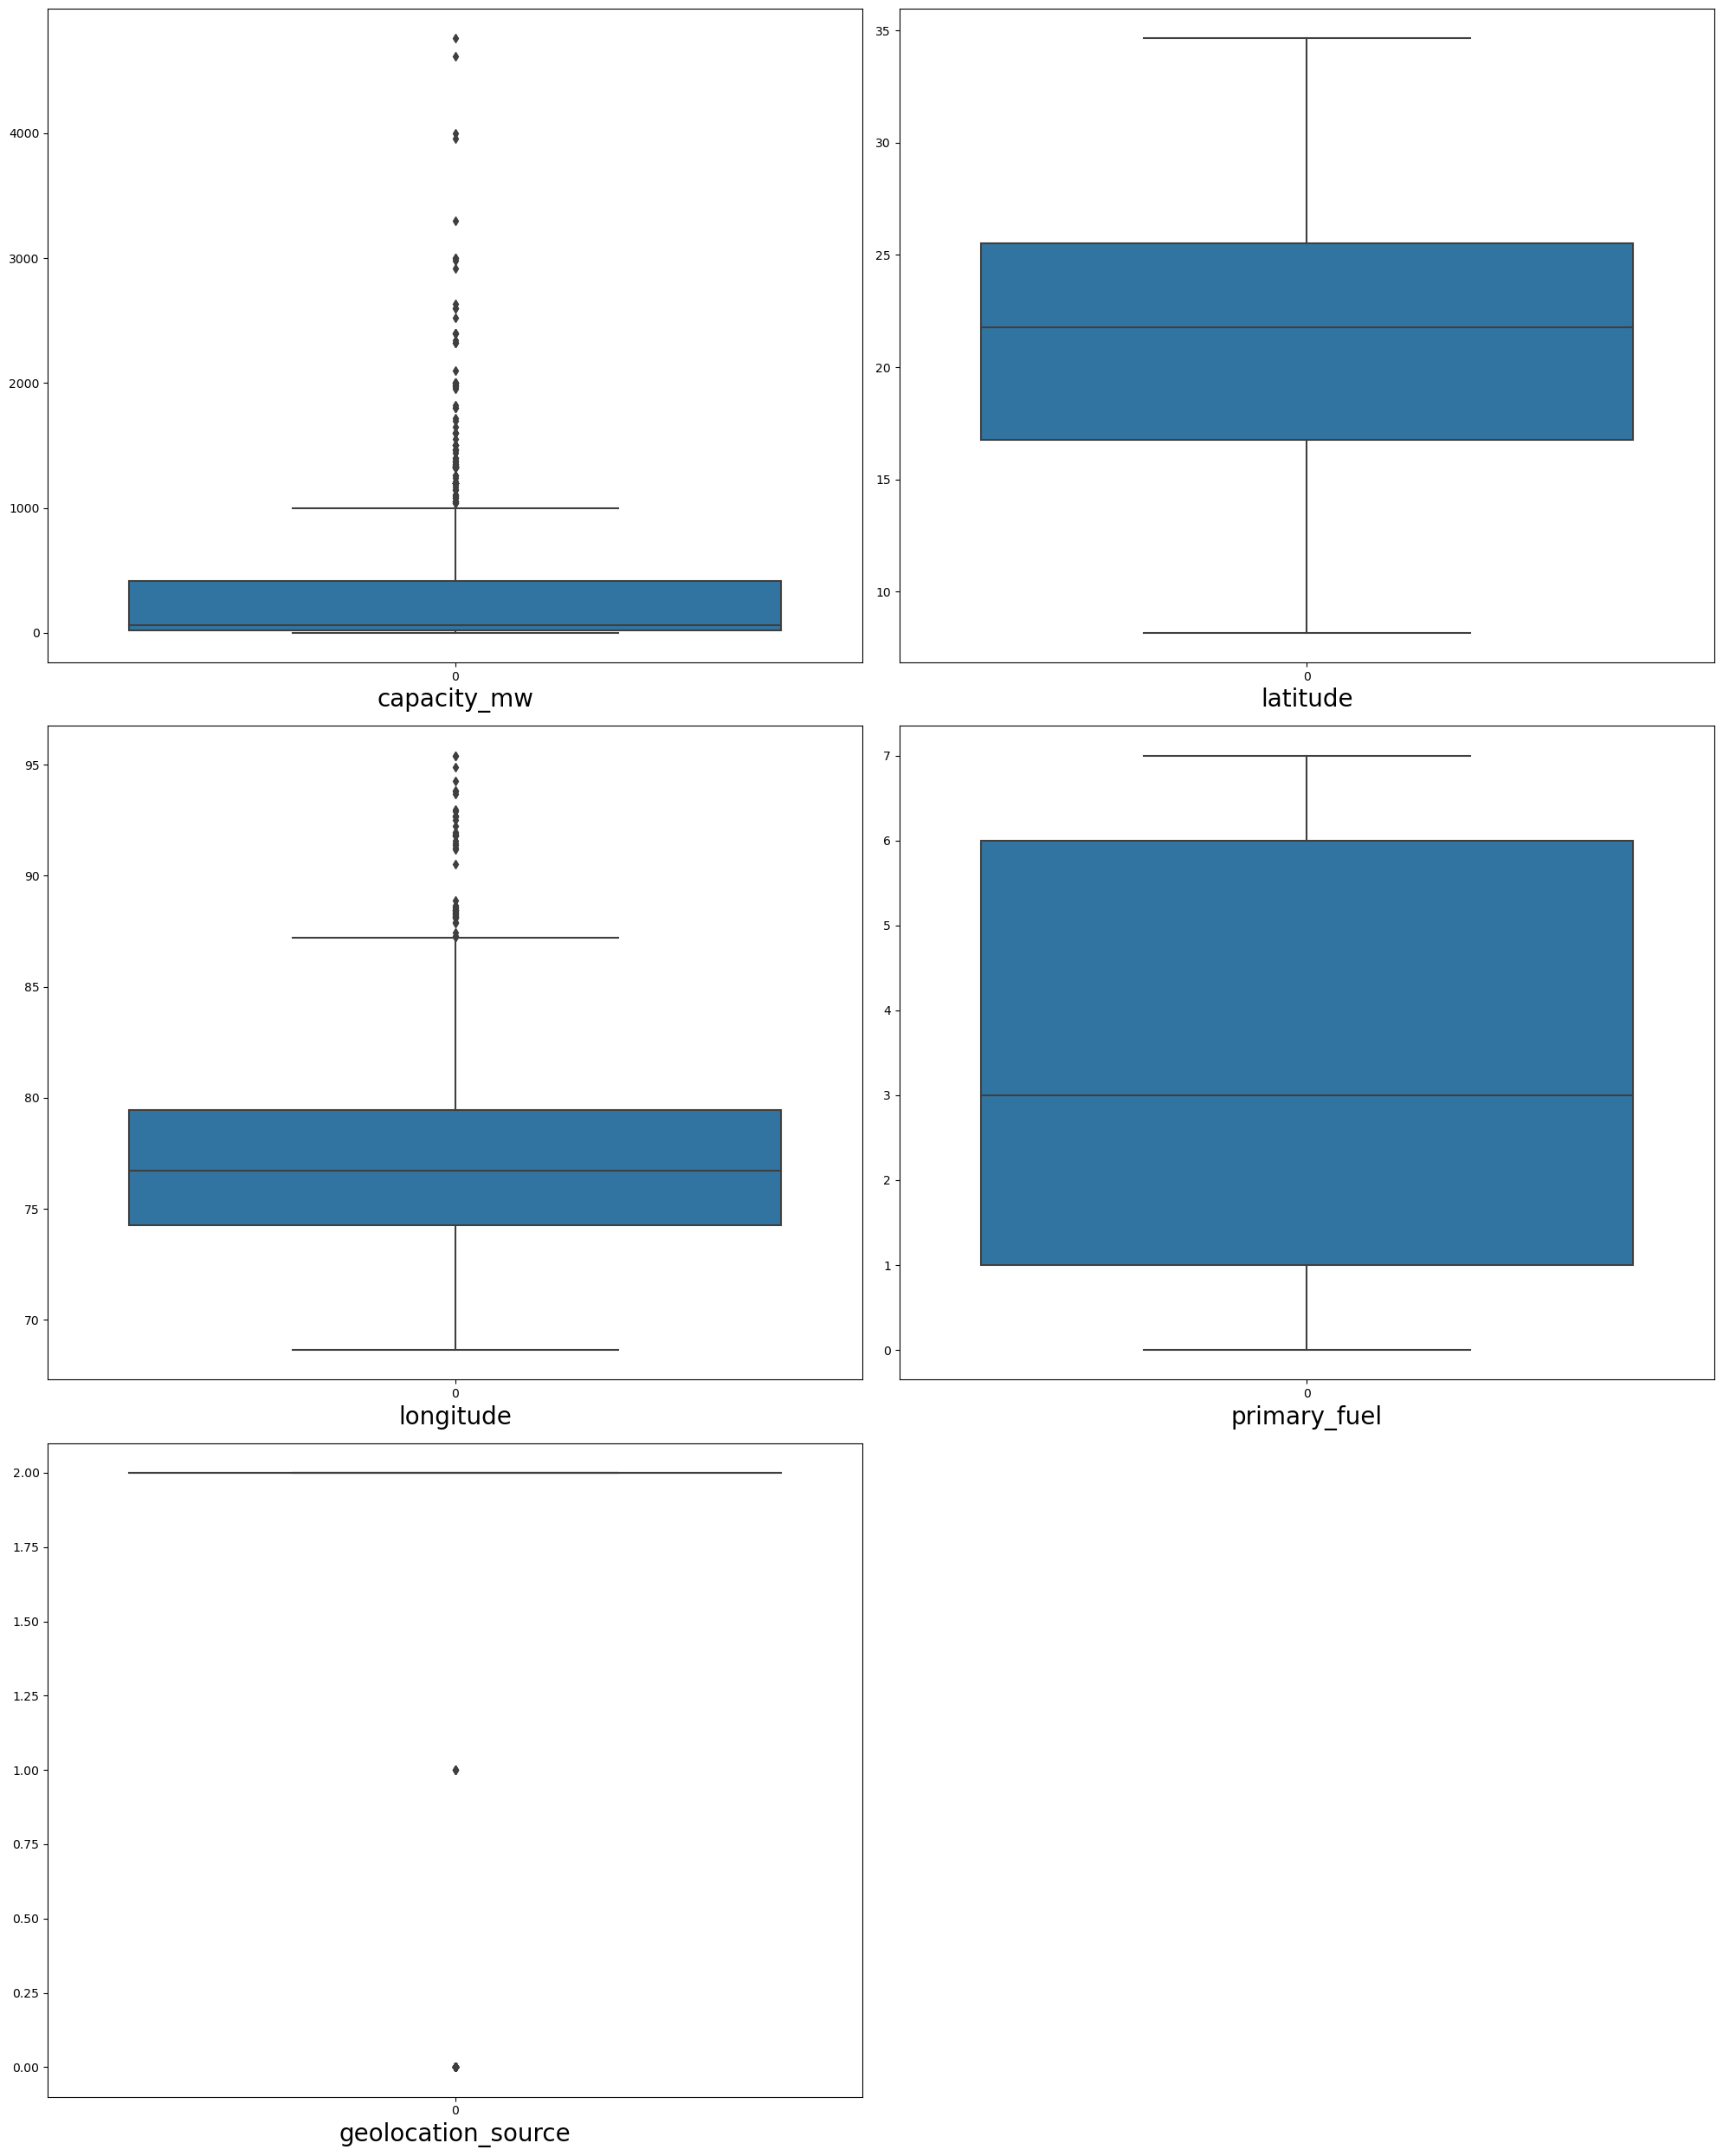

In [28]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data2.columns:
    if graph <= 6:
        plt.subplot(3, 2, graph)
        ax = sns.boxplot(data=data2[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()

##### From here we will copy the data and divide it into two separate part so that we can create both projects: Capacity_mw and Primary_fuel.

### For primary_fuel

In [29]:
data2_copy = data2.copy(deep = True)

In [30]:
data2_copy.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source
0,2.5,28.1839,73.2407,6.0,1.0
1,98.0,24.7663,74.6090,1.0,2.0
2,39.2,21.9038,69.3732,7.0,2.0
3,135.0,23.8712,91.3602,2.0,2.0
4,1800.0,21.9603,82.4091,1.0,2.0


##### Now we will first remove the outliers.
##### Because capacity mw and latitude both are continuous data.  Therefore, we will delete these outliers.  All the rest is categorical data.

In [31]:
#Find the IQR to identify outliers

# 1st quantile
q1_1 = data2_copy.quantile(0.25)

#3rd quantile 
q3_1 = data2_copy.quantile(0.75)

#IQR
iqr1 = q3_1 - q1_1

In [32]:
cm_high = (q3_1['capacity_mw'] + (1.5* iqr1['capacity_mw']))
print(cm_high)

cm_index= np.where(data2_copy['capacity_mw']> cm_high) 
print (cm_index)

data2_copy = data2_copy.drop(data2_copy.index[cm_index])
print (data2_copy.shape ) 

data2_copy.reset_index()

1003.05
(array([  4,  10,  12,  14,  17,  41,  53,  57,  69,  72,  87, 137, 141,
       152, 156, 161, 162, 199, 269, 270, 277, 286, 297, 299, 304, 308,
       320, 338, 345, 349, 350, 352, 354, 359, 361, 364, 375, 376, 399,
       402, 428, 429, 435, 450, 452, 459, 469, 470, 500, 501, 507, 510,
       517, 531, 537, 550, 551, 566, 569, 590, 594, 595, 598, 602, 604,
       616, 617, 620, 626, 628, 646, 648, 651, 660, 664, 666, 669, 675,
       687, 689, 690, 692, 695, 704, 706, 730, 743, 744, 745, 749, 756,
       765, 777, 797, 798, 801, 805, 823, 832, 836, 839, 843, 856],
      dtype=int64),)
(758, 5)


,index,capacity_mw,latitude,longitude,primary_fuel,geolocation_source
0,0,2.5,28.1839,73.2407,6.0,1.0
1,1,98.0,24.7663,74.6090,1.0,2.0
2,2,39.2,21.9038,69.3732,7.0,2.0
3,3,135.0,23.8712,91.3602,2.0,2.0
4,5,250.0,23.7689,68.6447,1.0,2.0
...,...,...,...,...,...,...
753,901,106.6,13.1156,77.5838,5.0,2.0
754,903,3.0,12.8932,78.1654,6.0,0.0
755,904,25.5,15.2758,75.5811,7.0,2.0
756,905,80.0,24.3500,73.7477,1.0,2.0


In [33]:
lon_high = (q3_1['longitude'] + (1.5* iqr1['longitude']))
print(lon_high)

lon_index= np.where(data2_copy['longitude']> lon_high) 
print (lon_index)

data2_copy = data2_copy.drop(data2_copy.index[lon_index])
print (data2_copy.shape ) 

data2_copy.reset_index()

87.21769999999998
(array([  3,  40,  47,  86,  90, 132, 138, 154, 155, 159, 164, 211, 216,
       224, 249, 256, 264, 286, 293, 299, 317, 337, 362, 370, 412, 427,
       446, 454, 465, 484, 494, 543, 545, 546, 556, 614, 660, 662, 663,
       664, 665, 674, 683, 703, 707, 708], dtype=int64),)
(712, 5)


,index,capacity_mw,latitude,longitude,primary_fuel,geolocation_source
0,0,2.5,28.1839,73.2407,6.0,1.0
1,1,98.0,24.7663,74.6090,1.0,2.0
2,2,39.2,21.9038,69.3732,7.0,2.0
3,5,250.0,23.7689,68.6447,1.0,2.0
4,6,60.0,10.4547,77.0078,3.0,2.0
...,...,...,...,...,...,...
707,901,106.6,13.1156,77.5838,5.0,2.0
708,903,3.0,12.8932,78.1654,6.0,0.0
709,904,25.5,15.2758,75.5811,7.0,2.0
710,905,80.0,24.3500,73.7477,1.0,2.0


In [34]:
data2_copy.skew()

capacity_mw           1.901870
latitude             -0.020038
longitude             0.520766
primary_fuel          0.262963
geolocation_source   -1.774559
dtype: float64

#### We will remove the skew from the capacity_mw because the skew is now present in it.

In [35]:
data2_copy['capacity_mw'] = np.cbrt(data2_copy['capacity_mw'])

In [36]:
data2_copy.skew()

capacity_mw           0.810002
latitude             -0.020038
longitude             0.520766
primary_fuel          0.262963
geolocation_source   -1.774559
dtype: float64

#### Will differentiate features and lable.

In [37]:
x1 = data2_copy.drop('primary_fuel',axis = 1)
y1 = data2_copy['primary_fuel']


#### Data imbalance problem

In [38]:
y1.value_counts()

3.0    200
1.0    156
6.0    122
7.0    108
2.0     54
0.0     50
5.0     17
4.0      5
Name: primary_fuel, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


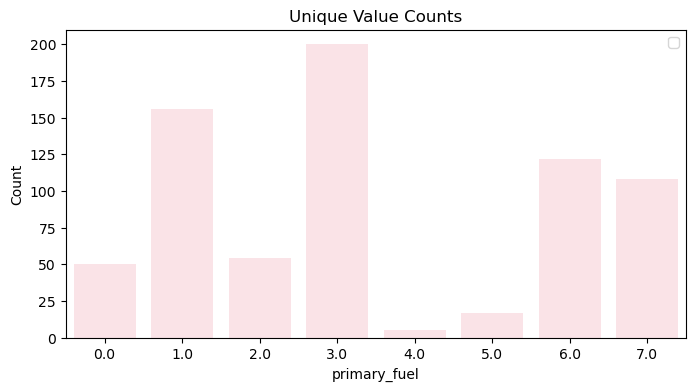

In [39]:
fig, ax = plt.subplots(figsize=(8, 4))
value_counts = y1.value_counts()

sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, color='pink', alpha=0.5)
ax.set_xlabel('primary_fuel')
ax.set_ylabel('Count')
ax.set_title('Unique Value Counts')

ax.legend()

plt.show()


#### The samples of 2.0,0.0,4.0,5.0 fuel are very less.

#### We will over sample this.

In [40]:
from imblearn.over_sampling import RandomOverSampler
d = {0.0:100, 2.0:100, 4.0:50,5.0:50}
ros = RandomOverSampler(sampling_strategy=d, random_state=11)
x1_resampled, y1_resampled = ros.fit_resample(x1, y1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


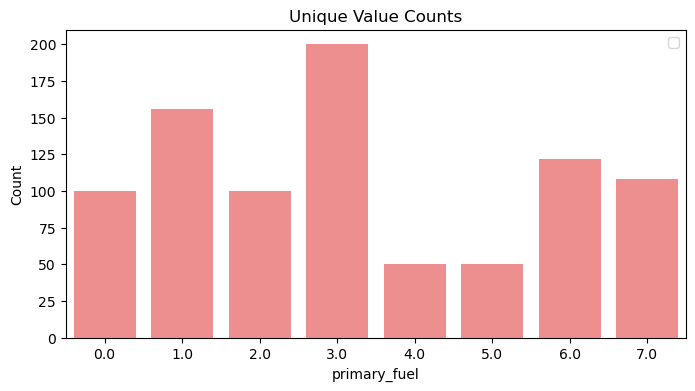

In [41]:
fig, ax = plt.subplots(figsize=(8, 4))
value_counts = y1_resampled.value_counts()

sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, color='red', alpha=0.5)
ax.set_xlabel('primary_fuel')
ax.set_ylabel('Count')
ax.set_title('Unique Value Counts')

ax.legend()

plt.show()

##### now this is better

In [42]:
### After dividing variable I scaled independent variable to normalizes the data
scalar1 = StandardScaler() 
x1_scaled = scalar1.fit_transform(x1_resampled)

In [43]:
## train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1_scaled,y1_resampled,test_size = 0.25, random_state= 42)

In [44]:
# Write a function and call as many as time to check accuracy_score of different models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

def metric_score(clf,x1_train,x1_test,y1_train,y1_test, train=True):
    if train:
        y1_pred = clf.predict(x1_train)
        print("\n========================Train Result======================\n")
        print(f"Accuracy Score:  {accuracy_score(y1_train, y1_pred) * 100:.2f}%")
        
    elif train==False:
        pred1 = clf.predict(x1_test)
        print("\n========================Test Result==========================")
        print(f"Accuracy Score:  {accuracy_score(y1_test, pred1) * 100:.2f}%")
        print('\n \n Test Classifiction Report \n', classification_report(y1_test, pred1,digits=2))

#### DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
clf1 = DecisionTreeClassifier()
clf1.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [47]:
# Call the function and pass dataset to check train and test score
metric_score(clf1,x1_train,x1_test,y1_train,y1_test, train=True)         
metric_score(clf1,x1_train,x1_test,y1_train,y1_test, train=False)      


========================Train Result======================

Accuracy Score:  100.00%

========================Test Result==========================
Accuracy Score:  75.23%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.94      0.76      0.84        21
         1.0       0.55      0.65      0.60        43
         2.0       0.67      0.70      0.68        23
         3.0       0.77      0.59      0.67        56
         4.0       1.00      1.00      1.00        10
         5.0       0.92      0.86      0.89        14
         6.0       1.00      1.00      1.00        32
         7.0       0.62      0.87      0.73        23

    accuracy                           0.75       222
   macro avg       0.81      0.80      0.80       222
weighted avg       0.77      0.75      0.75       222



#### RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc1 = RandomForestClassifier()
rfc1.fit(x1_train,y1_train)

RandomForestClassifier()

In [50]:
# Call the function and pass dataset to check train and test score
metric_score(rfc1,x1_train,x1_test,y1_train,y1_test, train=True)         
metric_score(rfc1,x1_train,x1_test,y1_train,y1_test, train=False)      


========================Train Result======================

Accuracy Score:  100.00%

========================Test Result==========================
Accuracy Score:  77.93%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91        21
         1.0       0.62      0.60      0.61        43
         2.0       0.67      0.78      0.72        23
         3.0       0.72      0.61      0.66        56
         4.0       0.91      1.00      0.95        10
         5.0       1.00      0.86      0.92        14
         6.0       1.00      1.00      1.00        32
         7.0       0.75      0.91      0.82        23

    accuracy                           0.78       222
   macro avg       0.82      0.84      0.83       222
weighted avg       0.78      0.78      0.78       222



#### Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score

##### RandomForestClassifier

In [52]:
cross_val_scores = cross_val_score(rfc1, x1_scaled, y1_resampled, cv=5, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)


Mean Cross-Validation Accuracy: 0.8104043674220783


##### DecisionTreeClassifier

In [53]:
cross_val_scores = cross_val_score(clf1, x1_scaled, y1_resampled, cv=5, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)


Mean Cross-Validation Accuracy: 0.7855392623627246


#### Cross validation shows that our model is not overfit, but its accuracy is very low so we will hyperparameter tune it. 
##### Random Forest has better accuracy, so I will choose Random Forest model.

#### Hyperparameter tuning

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = {
    'n_estimators': [2,3,5],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

In [56]:
grid_search = GridSearchCV(estimator=rfc1, param_grid=param_grid, cv=5, scoring='accuracy')

In [57]:
grid_search.fit(x1_train, y1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [2, 3, 5]},
             scoring='accuracy')

In [58]:
best_params = grid_search.best_params_
best_params

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 5}

In [59]:
grid_search.best_score_

0.7666210982000455

In [60]:
rfc1_tun = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1,min_samples_split=2,n_estimators=5)
rfc1_tun.fit(x1_train,y1_train)


RandomForestClassifier(max_features='sqrt', n_estimators=5)

In [61]:
metric_score(rfc1_tun,x1_train,x1_test,y1_train,y1_test, train=True)       
metric_score(rfc1_tun,x1_train,x1_test,y1_train,y1_test, train=False)       


========================Train Result======================

Accuracy Score:  97.14%

========================Test Result==========================
Accuracy Score:  74.77%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.74      0.95      0.83        21
         1.0       0.53      0.60      0.57        43
         2.0       0.71      0.65      0.68        23
         3.0       0.69      0.62      0.65        56
         4.0       0.91      1.00      0.95        10
         5.0       0.92      0.79      0.85        14
         6.0       1.00      1.00      1.00        32
         7.0       0.89      0.74      0.81        23

    accuracy                           0.75       222
   macro avg       0.80      0.79      0.79       222
weighted avg       0.76      0.75      0.75       222



#### Earlier the accuracy was better so we will select that model.

In [62]:
import pickle

In [63]:
pickle.dump(rfc1,open('primary_fuel','wb'))

### For capacity_mw

In [64]:
data3_copy = data2.copy(deep = True)

In [65]:
data3_copy.shape

(861, 5)

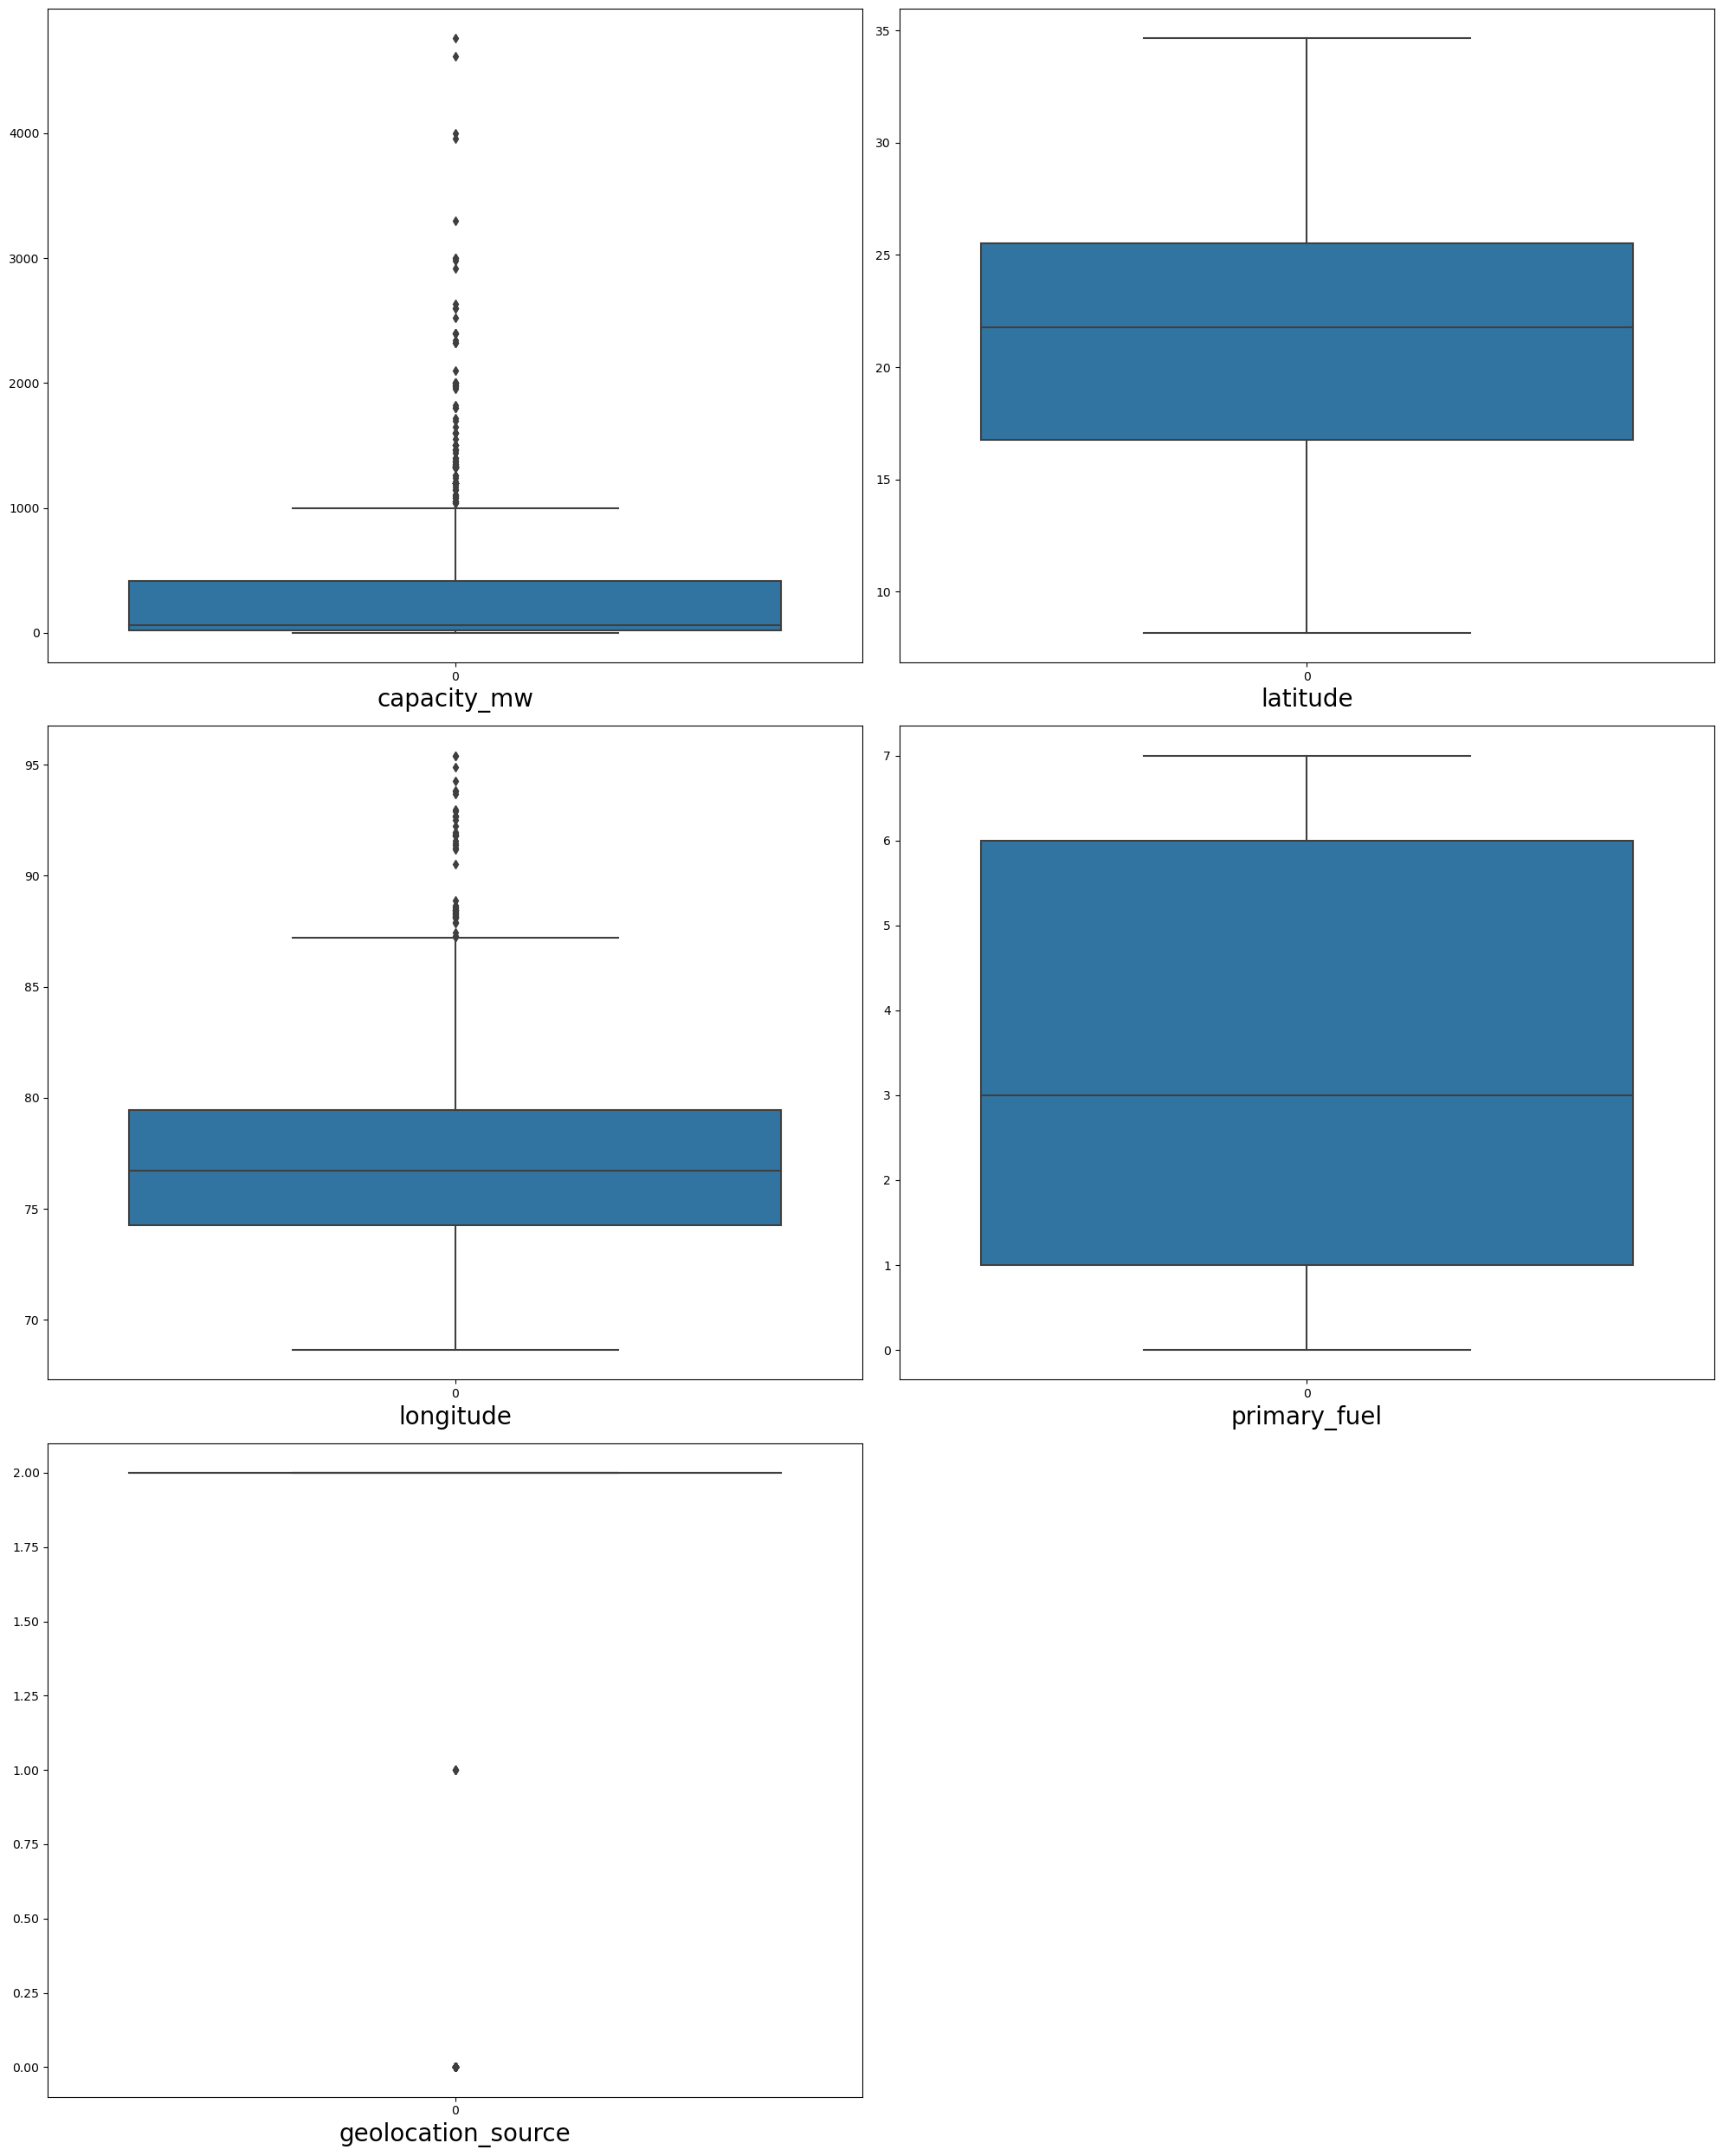

In [66]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data3_copy.columns:
    if graph <= 6:
        plt.subplot(3, 2, graph)
        ax = sns.boxplot(data=data3_copy[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()

##### Right now we will not remove the outliers of capacity because that is our label, for now we will only remove the outliers of longitude.

In [67]:
#Find the IQR to identify outliers

# 1st quantile
q1 = data3_copy.quantile(0.25)

#3rd quantile 
q3 = data3_copy.quantile(0.75)

#IQR
iqr = q3 - q1

In [68]:
long_high = (q3['longitude'] + (1.5* iqr['longitude']))
print(long_high)

long_index= np.where(data3_copy['longitude']> long_high) 
print (long_index)

data3_copy = data3_copy.drop(data3_copy.index[long_index])
print (data3_copy.shape ) 

data3_copy.reset_index()

87.21769999999998
(array([  3,  41,  46,  54,  97, 101, 145, 151, 171, 172, 176, 181, 199,
       229, 234, 242, 267, 276, 285, 297, 312, 319, 326, 338, 346, 373,
       401, 410, 457, 475, 494, 504, 518, 539, 549, 608, 610, 611, 624,
       648, 697, 750, 752, 753, 754, 755, 756, 766, 775, 796, 803, 804],
      dtype=int64),)
(809, 5)


,index,capacity_mw,latitude,longitude,primary_fuel,geolocation_source
0,0,2.5,28.1839,73.2407,6.0,1.0
1,1,98.0,24.7663,74.6090,1.0,2.0
2,2,39.2,21.9038,69.3732,7.0,2.0
3,4,1800.0,21.9603,82.4091,1.0,2.0
4,5,250.0,23.7689,68.6447,1.0,2.0
...,...,...,...,...,...,...
804,902,1600.0,16.2949,77.3568,1.0,2.0
805,903,3.0,12.8932,78.1654,6.0,0.0
806,904,25.5,15.2758,75.5811,7.0,2.0
807,905,80.0,24.3500,73.7477,1.0,2.0


In [69]:
data3_copy.skew()

capacity_mw           3.061525
latitude             -0.053026
longitude             0.448975
primary_fuel          0.453357
geolocation_source   -1.982452
dtype: float64

#### there is no skewness

In [70]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [71]:
x = data3_copy.drop('capacity_mw',axis = 1)
y = data3_copy['capacity_mw']

In [72]:
#Scaled the features
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25, random_state = 1000)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def metric_score1(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n============Train Result================")
        mae = mean_absolute_error(y_train, y_pred)
        mse = mean_squared_error(y_train, y_pred)
        r2 = r2_score(y_train, y_pred)
        print("Mean Absolute Error : ",mae)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)

    elif not train:
        y_pred = clf.predict(x_test)
        print("\n============Test Result================")
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("Mean Absolute Error : ",mae)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)


### KNeighborsRegressor

In [75]:
knn= KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [76]:
metric_score1(knn,x_train,x_test,y_train,y_test,train=True)        
metric_score1(knn,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  216.53905478547856
Mean Squared Error :  150446.1069815407
R-squared (R2) Score :  0.5727514755892011

============Test Result================
Mean Absolute Error :  307.44739802955667
Mean Squared Error :  399200.5111361657
R-squared (R2) Score :  0.0383783136058683


### LinearRegression

In [77]:
lin= LinearRegression() 
lin.fit(x_train, y_train)

LinearRegression()

In [78]:
metric_score1(lin,x_train,x_test,y_train,y_test,train=True)        
metric_score1(lin,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  341.01191147463175
Mean Squared Error :  284202.89037015935
R-squared (R2) Score :  0.19289858687514516

============Test Result================
Mean Absolute Error :  358.7484238044299
Mean Squared Error :  373436.3360340325
R-squared (R2) Score :  0.10044083311455754


### DecisionTreeRegressor

In [79]:
dtr= DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [80]:
metric_score1(dtr,x_train,x_test,y_train,y_test,train=True)        
metric_score1(dtr,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  7.276897689768977
Mean Squared Error :  2506.9932508250827
R-squared (R2) Score :  0.9928804461038379

============Test Result================
Mean Absolute Error :  328.1709261083743
Mean Squared Error :  450946.19207789167
R-squared (R2) Score :  -0.08627024666068484


### AdaBoostRegressor

In [81]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [82]:
metric_score1(ada,x_train,x_test,y_train,y_test,train=True)        
metric_score1(ada,x_train,x_test,y_train, y_test,train=False)        


============Train Result================
Mean Absolute Error :  503.8809812039955
Mean Squared Error :  306862.41846243077
R-squared (R2) Score :  0.12854830134428818

============Test Result================
Mean Absolute Error :  559.4013862198169
Mean Squared Error :  486789.01644166565
R-squared (R2) Score :  -0.1726109106836935


### Data it salfe is not good